In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


In [5]:
x = df.drop(columns=['Grades'])
y = df['Grades']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
X_train.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%)
978,0.17945,3.5,9.9,47.0
289,0.26956,3.2,8.5,49.0
1158,0.44467,2.9,9.4,59.0
802,0.83201,3.2,8.2,56.0
1133,0.43400,6.0,8.6,66.0


D:\Temp\ipykernel_17712\2483325178.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Socioeconomic Score'])


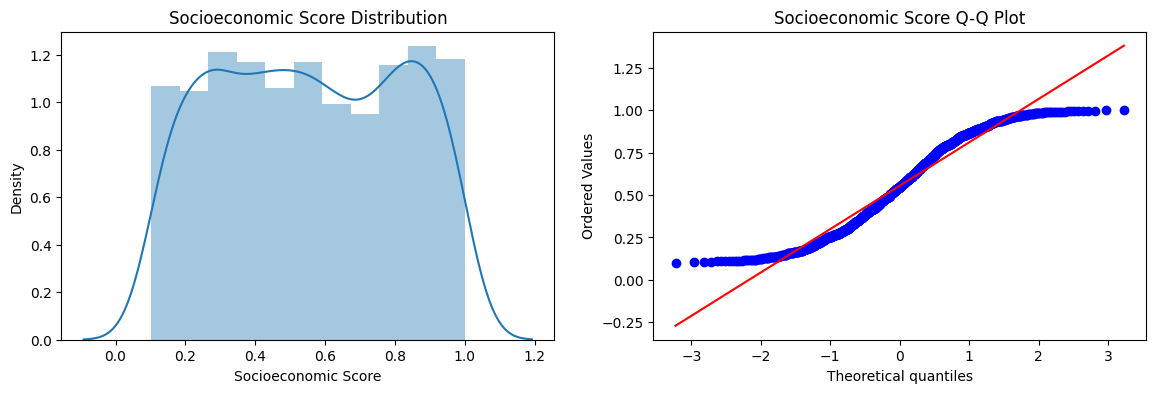

In [8]:
plt.figure(figsize=(14, 4))
plt.subplot(121)

sns.distplot(X_train['Socioeconomic Score'])
plt.title('Socioeconomic Score Distribution')

plt.subplot(122)
stats.probplot(X_train['Socioeconomic Score'], plot=plt)
plt.title('Socioeconomic Score Q-Q Plot')

plt.show()

In [12]:
clf1 = LinearRegression()
clf2 = DecisionTreeClassifier()

In [14]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_prd1 = clf1.predict(X_test)
y_prd2 = clf2.predict(X_test)

# print('Linear Regression Accuracy:', accuracy_score(y_test, y_prd1))
print('Decision Tree Accuracy:', accuracy_score(y_test, y_prd2))

Decision Tree Accuracy: 0.23741007194244604


In [18]:
trf = FunctionTransformer(lambda x : x**2)

In [20]:
X_train_transform = trf.fit_transform(X_train)
X_test_transform = trf.fit_transform(X_test)

In [21]:
clf = DecisionTreeClassifier()

In [37]:
clf.fit(X_train_transform, y_train)
y_prd = clf.predict(X_test_transform)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_prd))

Decision Tree Accuracy: 0.20863309352517986


In [47]:
X_transformed = trf.fit_transform(x)

print(np.mean(cross_val_score(clf, X_transformed, y, cv=10, scoring='accuracy')))

C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.2816703159211761
